In [22]:
import pandas as pd
abortion = pd.read_csv('Abortion rate.csv')
birth = pd.read_csv('Birth rate.csv')
hiv = pd.read_csv('hiv data.csv')
pregnancy = pd.read_csv('Pregnancy rate.csv')
stds = pd.read_csv('stds_adjusted.csv')


In [23]:
abortion = pd.melt(abortion, id_vars='STATE', var_name='YEAR', value_name='abortion_rate')
abortion['State, Year'] = abortion['STATE'] + ', ' + abortion['YEAR']
abortion = abortion.drop(columns=['STATE', 'YEAR'])
abortion = pd.DataFrame(abortion, columns=['State, Year', 'abortion_rate'])

birth = pd.melt(birth, id_vars='STATE', var_name='YEAR', value_name='birth_rate')
birth['State, Year'] = birth['STATE'] + ', ' + birth['YEAR']
birth = birth.drop(columns=['STATE', 'YEAR'])
birth = pd.DataFrame(birth, columns=['State, Year', 'birth_rate'])

pregnancy = pd.melt(pregnancy, id_vars='STATE', var_name='YEAR', value_name='pregnancy_rate')
pregnancy['State, Year'] = pregnancy['STATE'] + ', ' + pregnancy['YEAR']
pregnancy = pregnancy.drop(columns=['STATE', 'YEAR'])
pregnancy = pd.DataFrame(pregnancy, columns=['State, Year', 'pregnancy_rate'])

hiv['State, Year'] = hiv['STATE'] + ', ' + hiv['YEAR'].astype(str)
hiv = hiv.drop(columns=['STATE', 'YEAR', 'AGE', 'HIV'])
hiv = pd.DataFrame(hiv, columns=['State, Year', 'HIV Rate per 100,000'])

stds = stds.groupby(['STATE', 'YEAR'])['STD Rate per 100,000 People'].mean().reset_index()
stds['State, Year'] = stds['STATE'] + ', ' + stds['YEAR'].astype(str)
stds = stds.drop(columns=['STATE', 'YEAR'])
stds = pd.DataFrame(stds, columns=['State, Year', 'STD Rate per 100,000 People'])

In [29]:
merged_df = abortion.merge(birth, on='State, Year', how='outer')
merged_df = merged_df.merge(pregnancy, on='State, Year', how='outer')
merged_df = merged_df.merge(hiv, on='State, Year', how='outer')
merged_df = merged_df.merge(stds, on='State, Year', how='outer')

In [43]:
merged_df = pd.read_csv('merged_data.csv')
merged_df['diff'] = merged_df['pregnancy_rate'].astype(float) - merged_df['abortion_rate'].astype(float)
condition = merged_df['diff'] <= merged_df['birth_rate']
result= merged_df.loc[condition]

print(f"满足条件的行数: {len(result)}")
print(result)

满足条件的行数: 0
Empty DataFrame
Columns: [State, Year, abortion_rate, birth_rate, pregnancy_rate, HIV Rate per 100,000, STD Rate per 100,000 People, diff]
Index: []


In [44]:
merged_df = pd.read_csv('merged_data.csv')
condition = merged_df['STD Rate per 100,000 People'].astype(float) <= merged_df['HIV Rate per 100,000'].astype(float)
result= merged_df.loc[condition]

print(f"满足条件的行数: {len(result)}")
print(result)

满足条件的行数: 1
        State, Year  abortion_rate  birth_rate  pregnancy_rate  \
990  Maryland, 2021            NaN         NaN             NaN   

     HIV Rate per 100,000  STD Rate per 100,000 People  
990                  16.2                          0.0  


In [45]:
merged_df = pd.read_csv('merged_data.csv')
summary_stats = merged_df.describe()

print(summary_stats)

       abortion_rate  birth_rate  pregnancy_rate  HIV Rate per 100,000  \
count     864.000000  867.000000      864.000000            714.000000   
mean       15.320255   36.064014       59.916319             13.443978   
std        11.376585   15.385990       25.891211             14.042161   
min         2.600000    8.000000       15.900000              0.000000   
25%         7.500000   24.200000       39.800000              5.200000   
50%        11.800000   34.000000       56.050000             10.050000   
75%        19.200000   46.000000       75.400000             18.125000   
max        75.000000  106.700000      156.200000            145.900000   

       STD Rate per 100,000 People  
count                   612.000000  
mean                    422.947851  
std                     195.418084  
min                       0.000000  
25%                     305.065256  
50%                     397.484528  
75%                     500.067843  
max                    1884.011468  


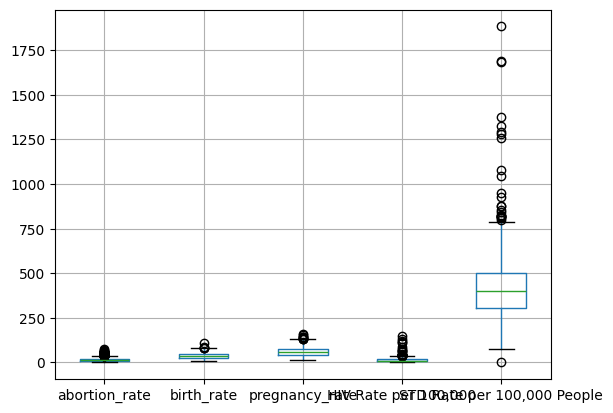

In [47]:
import matplotlib.pyplot as plt

merged_df.boxplot()
plt.show()

In [11]:
import pandas as pd
from scipy.interpolate import interp1d
merged_df = pd.read_csv('merged_data.csv')
merged_df[['State', 'Year']] = merged_df['State, Year'].str.split(', ', expand=True)
merged_df['Year'] = merged_df['Year'].astype(int)
state_list = merged_df['State'].unique()

variables = ['abortion_rate', 'birth_rate', 'pregnancy_rate', 'HIV Rate per 100,000', 'STD Rate per 100,000 People']

for state in merged_df['State'].unique():
    state_data = merged_df[merged_df['State'] == state]
    
    for var in variables:
        # 使用线性插值
        x = state_data['Year']
        y = state_data[var]
        x_interp = state_data['Year']
        y_interp = interp1d(x, y, kind='linear')(x_interp)
        state_data[f'{var}_linear'] = y_interp
        
        # 使用样条插值
        y_interp = interp1d(x, y, kind='cubic')(x_interp)
        state_data[f'{var}_spline'] = y_interp
    
    # 将补全后的数据合并回原始数据框
    merged_df.loc[merged_df['State'] == state] = state_data


C:\Users\hp\AppData\Local\Temp\ipykernel_27488\899703488.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data[f'{var}_linear'] = y_interp
C:\Users\hp\AppData\Local\Temp\ipykernel_27488\899703488.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data[f'{var}_spline'] = y_interp
C:\Users\hp\AppData\Local\Temp\ipykernel_27488\899703488.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [12]:
merged_df[merged_df['State']=='District of Columbia']

,"State, Year",abortion_rate,birth_rate,pregnancy_rate,"HIV Rate per 100,000","STD Rate per 100,000 People",State,Year
8,"District of Columbia, 1988",NaN,75.6,NaN,NaN,NaN,District of Columbia,1988
59,"District of Columbia, 1992",NaN,106.7,NaN,NaN,NaN,District of Columbia,1992
110,"District of Columbia, 1996",NaN,79.2,NaN,NaN,NaN,District of Columbia,1996
161,"District of Columbia, 2000",52.6,53.3,121.8,NaN,NaN,District of Columbia,2000
212,"District of Columbia, 2005",54.3,42.1,110.2,NaN,NaN,District of Columbia,2005
263,"District of Columbia, 2006",50.0,48.1,112.7,NaN,NaN,District of Columbia,2006
314,"District of Columbia, 2007",40.1,50.4,104.6,NaN,NaN,District of Columbia,2007
365,"District of Columbia, 2008",46.8,51.1,112.9,145.9,NaN,District of Columbia,2008
416,"District of Columbia, 2009",38.2,48.5,100.2,110.0,NaN,District of Columbia,2009
467,"District of Columbia, 2010",32.7,45.5,90.6,132.3,1687.266106,District of Columbia,2010


In [4]:
merged_df.to_csv('interpolated_data.csv', index=False)

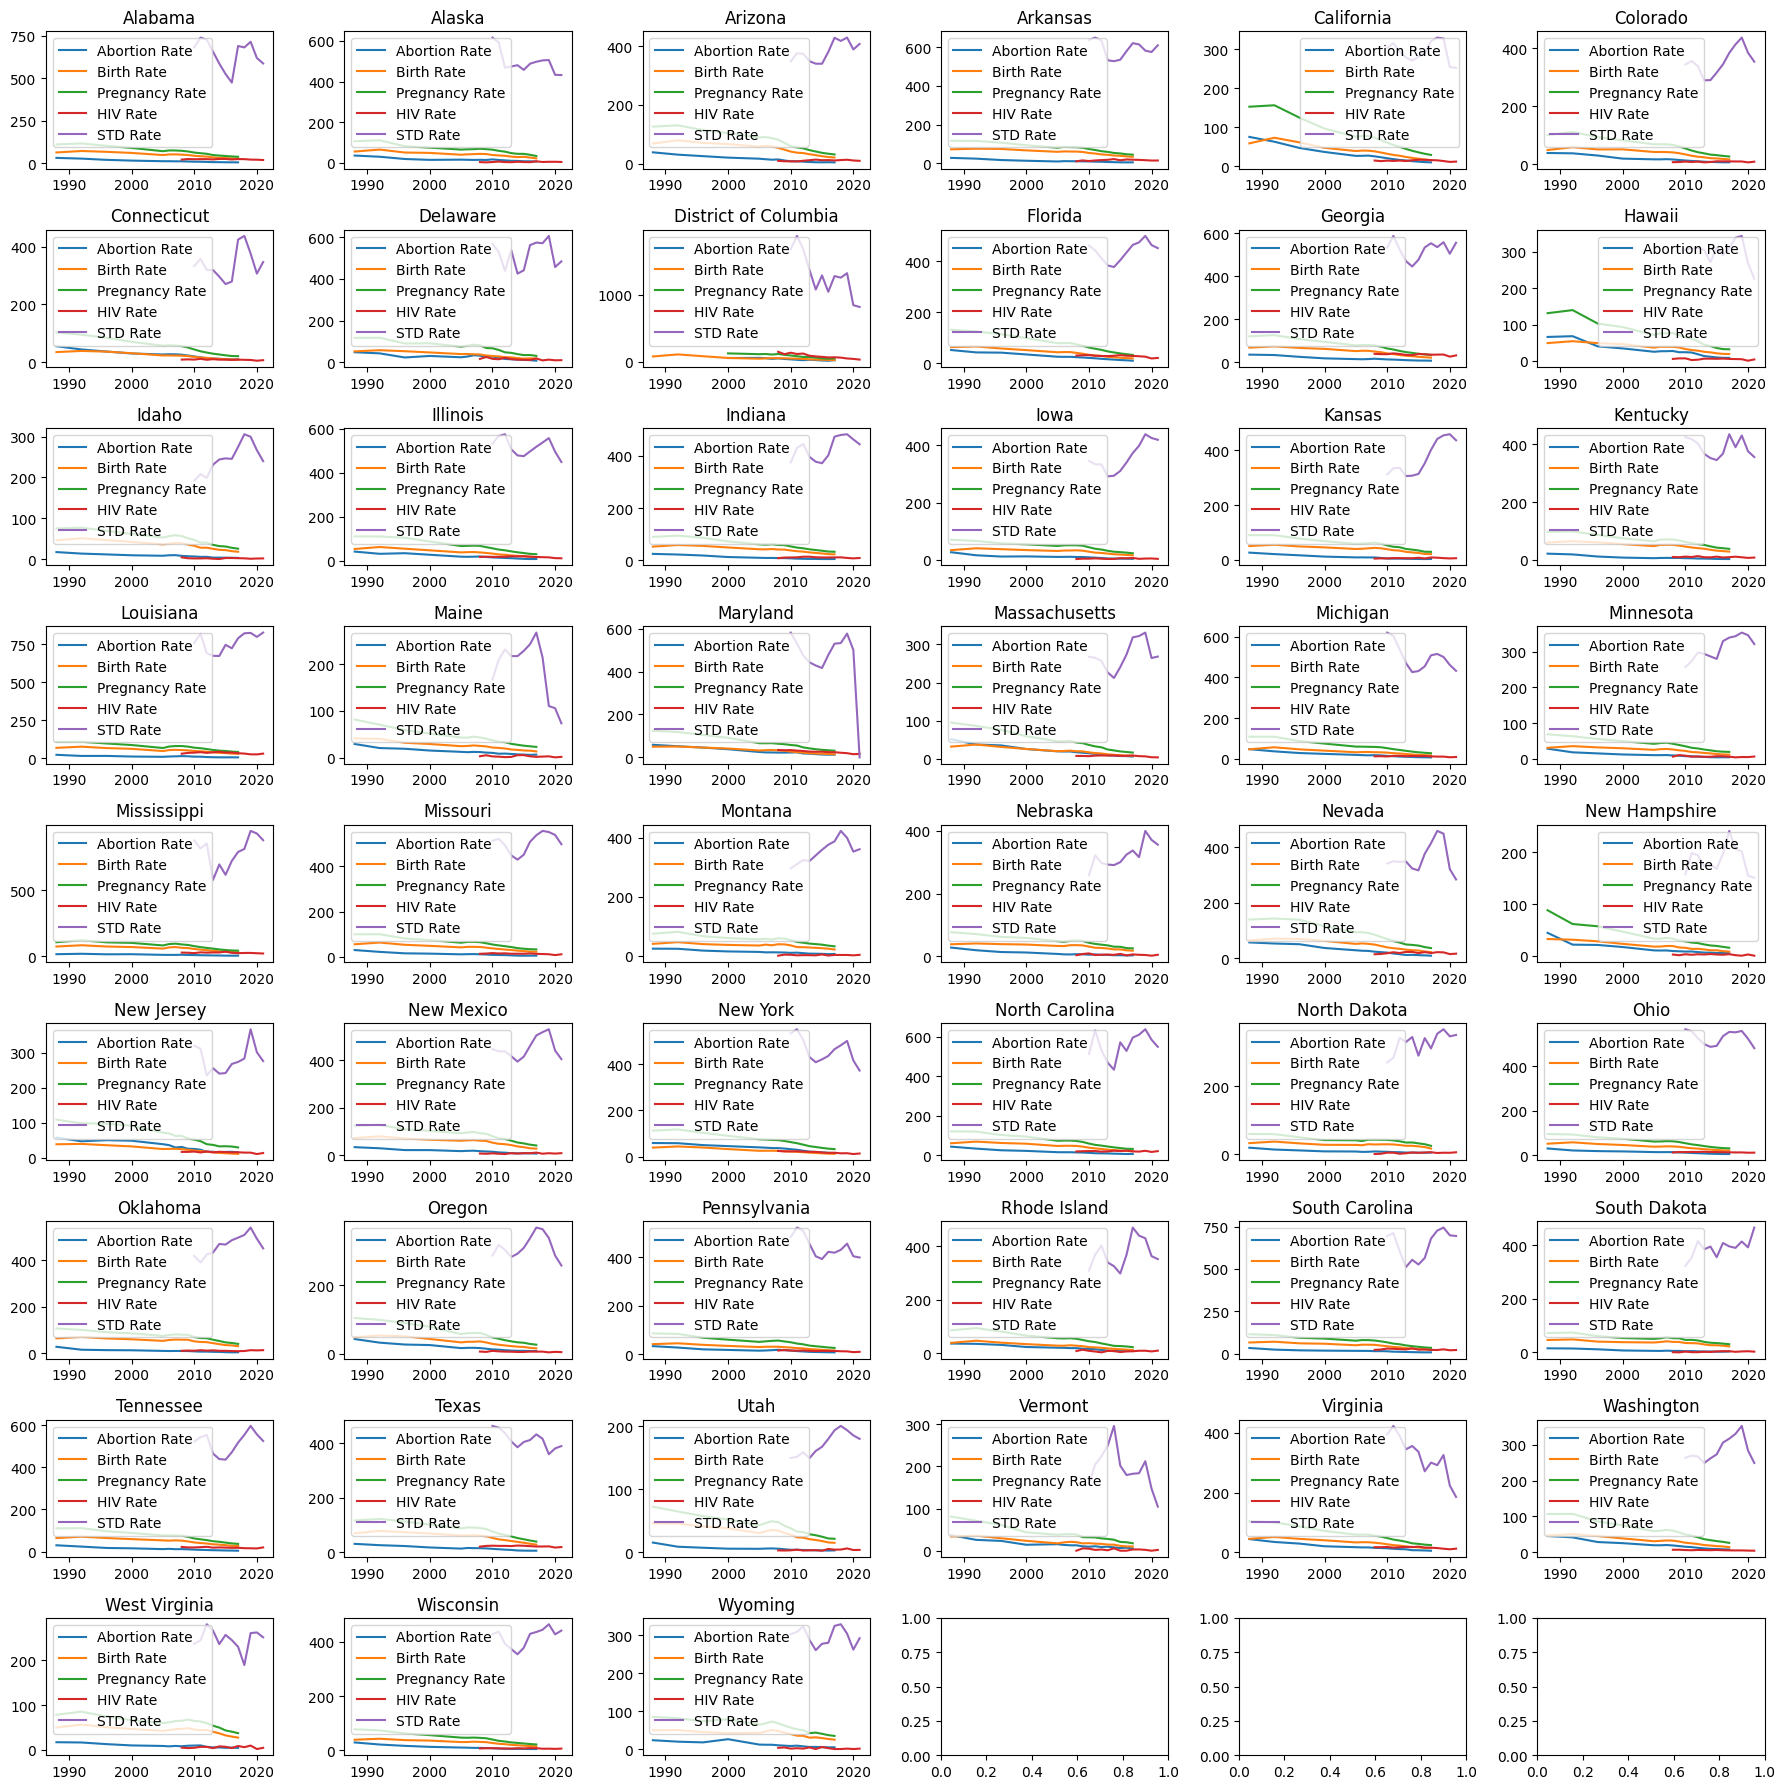

In [8]:
import matplotlib.pyplot as plt
merged_df = pd.read_csv('merged_data.csv')
merged_df[['State', 'Year']] = merged_df['State, Year'].str.split(', ', expand=True)
merged_df['Year'] = merged_df['Year'].astype(int)
state_list = merged_df['State'].unique()
num_states = len(state_list)
rows = (num_states + 5) // 6  # 向上取整
cols = 6

fig, axes = plt.subplots(rows, cols, figsize=(18, 18))

# 遍历每个州,绘制折线图
for i, state in enumerate(state_list):
    row = i // 6
    col = i % 6
    
    state_data = merged_df[merged_df['State'] == state]
    
    axes[row, col].plot(state_data['Year'], state_data['abortion_rate'], label='Abortion Rate')
    axes[row, col].plot(state_data['Year'], state_data['birth_rate'], label='Birth Rate')
    axes[row, col].plot(state_data['Year'], state_data['pregnancy_rate'], label='Pregnancy Rate')
    axes[row, col].plot(state_data['Year'], state_data['HIV Rate per 100,000'], label='HIV Rate')
    axes[row, col].plot(state_data['Year'], state_data['STD Rate per 100,000 People'], label='STD Rate')
    
    axes[row, col].set_title(state)
    axes[row, col].legend()

plt.tight_layout()
plt.show()

                             abortion_rate  birth_rate  pregnancy_rate  \
abortion_rate                     1.000000    0.409734        0.769894   
birth_rate                        0.409734    1.000000        0.897592   
pregnancy_rate                    0.769894    0.897592        1.000000   
HIV Rate per 100,000              0.480946    0.251886        0.417148   
STD Rate per 100,000 People       0.337961    0.416180        0.517185   

                             HIV Rate per 100,000  STD Rate per 100,000 People  
abortion_rate                            0.480946                     0.337961  
birth_rate                               0.251886                     0.416180  
pregnancy_rate                           0.417148                     0.517185  
HIV Rate per 100,000                     1.000000                     0.820790  
STD Rate per 100,000 People              0.820790                     1.000000  


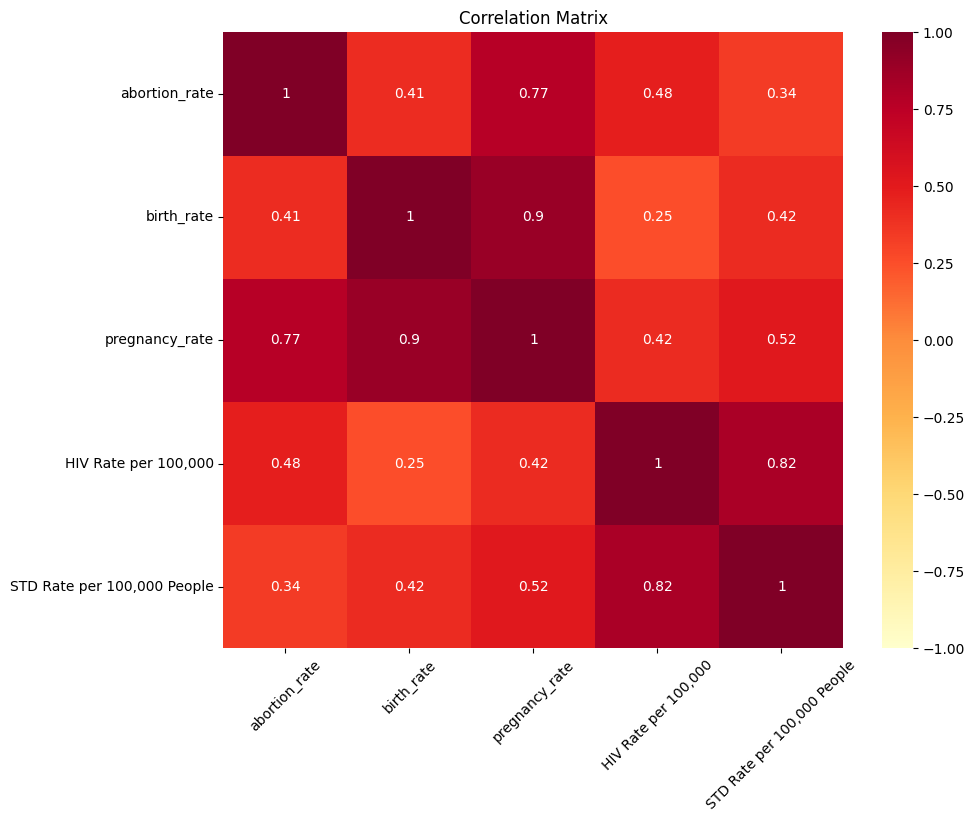

In [10]:
data = pd.read_csv('merged_data.csv')

# 计算相关系数矩阵
corr_matrix = data[['abortion_rate', 'birth_rate', 'pregnancy_rate', 'HIV Rate per 100,000', 'STD Rate per 100,000 People']].corr()

# 显示相关系数矩阵
print(corr_matrix)


import seaborn as sns

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import geodatasets

states_geo = gpd.read_file(geodatasets.get_path('states_usa'))

data[['State', 'Year']] = data['State, Year'].str.split(', ', expand=True)
data['Year'] = data['Year'].astype(int)

# 将数据与地理信息合并
merged = states_geo.merge(data, on='State', how='left')

# 绘制各州的怀孕率热力图
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='pregnancy_rate', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Pregnancy Rate by State')
ax.set_axis_off()
plt.show()

# 绘制各州的STD率热力图
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='STD Rate per 100,000 People', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('STD Rate by State')
ax.set_axis_off()
plt.show()

# 使用 Folium 绘制交互式地图
m = folium.Map(location=[39, -96], zoom_start=4)
folium.Choropleth(
    geo_data=states_geo,
    name='Choropleth',
    data=merged,
    columns=['State', 'pregnancy_rate'],
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pregnancy Rate'
).add_to(m)
m

ValueError: No matching item found for the query 'states_usa'.

In [63]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 假设你的数据已经读取并存储在 merged_df 中
# 数据格式为 state, year, abortion_rate, birth_rate

merged_df = pd.read_csv('merged_data.csv')
merged_df[['state', 'year']] = merged_df['State, Year'].str.split(', ', expand=True)
# 将数据重塑为时间序列格式
df = merged_df.set_index(['state', 'year'])

# 将年份转换为字符串类型
df.index = df.index.set_levels(df.index.levels[1].astype(str), level=1)
df = df.sort_index()

# 只保留2010-2017年的数据
df = df.loc[pd.IndexSlice[:, '2010':'2017'], :]
state_list = df.index.get_level_values(0).unique().tolist()
print(state_list)
print(df.head(20))

# 计算每个州在各指标上的时间序列特征
features = []
for state in df.index.get_level_values(0).unique():
    state_df = df.loc[state]
    
    # 'abortion_rate'
    try:
        trend, seasonal, residual = seasonal_decompose(state_df['abortion_rate'], model='additive', period=1)
        trend_abortion = trend.mean()
        seasonal_abortion = seasonal.mean()
    except TypeError:
        trend_abortion = state_df['abortion_rate'].mean()
        seasonal_abortion = 0
        
    # 'birth_rate'
    try:
        trend, seasonal, residual = seasonal_decompose(state_df['birth_rate'], model='additive', period=1)
        trend_birth = trend.mean()
        seasonal_birth = seasonal.mean()
    except TypeError:
        trend_birth = state_df['birth_rate'].mean()
        seasonal_birth = 0
        
    # 'pregnancy_rate'
    try:
        trend, seasonal, residual = seasonal_decompose(state_df['pregnancy_rate'], model='additive', period=1)
        trend_pregnancy = trend.mean()
        seasonal_pregnancy = seasonal.mean()
    except TypeError:
        trend_pregnancy = state_df['pregnancy_rate'].mean()
        seasonal_pregnancy = 0
        
    # 'HIV Rate per 100,000'
    try:
        trend, seasonal, residual = seasonal_decompose(state_df['HIV Rate per 100,000'], model='additive', period=1)
        trend_hiv = trend.mean()
        seasonal_hiv = seasonal.mean()
    except TypeError:
        trend_hiv = state_df['HIV Rate per 100,000'].mean()
        seasonal_hiv = 0
        
    # 'STD Rate per 100,000 People'
    try:
        trend, seasonal, residual = seasonal_decompose(state_df['STD Rate per 100,000 People'], model='additive', period=1)
        trend_std = trend.mean()
        seasonal_std = seasonal.mean()
    except TypeError:
        trend_std = state_df['STD Rate per 100,000 People'].mean()
        seasonal_std = 0
        
    features.append([trend_abortion, seasonal_abortion, 
                    trend_birth, seasonal_birth,
                    trend_pregnancy, seasonal_pregnancy,
                    trend_hiv, seasonal_hiv,
                    trend_std, seasonal_std])

# 进行聚类
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(features)

# 将聚类结果添加回原始数据框
#df['cluster'] = pd.Series(labels, index=df.index)

# 可视化聚类结果
# fig, ax = plt.subplots(figsize=(12, 8))
# df.reset_index().plot(kind='scatter', x='abortion_rate', y='birth_rate', c=df['cluster'], cmap='rainbow', ax=ax)
# ax.set_title('Clustering of State-Year Data (2010-2017)')
# plt.show()

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
                State, Year  abortion_rate  birth_rate  pregnancy_rate  \
state   year                                                             
Alabama 2010  Alabama, 2010            9.1        44.0            62.8   
        2011  Alabama, 2011            8.8        41.0            58.9   
        2012  Alabama, 2012            7.7        39.1   

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [64]:
result_df = pd.DataFrame({
    'state': state_list,
    'cluster': labels
})

# 查看结果
print(result_df)

                   state  cluster
0                Alabama        2
1                 Alaska        4
2                Arizona        3
3               Arkansas        2
4             California        3
5               Colorado        3
6            Connecticut        3
7               Delaware        4
8   District of Columbia        1
9                Florida        4
10               Georgia        4
11                Hawaii        3
12                 Idaho        0
13              Illinois        4
14               Indiana        3
15                  Iowa        3
16                Kansas        3
17              Kentucky        3
18             Louisiana        2
19                 Maine        0
20              Maryland        4
21         Massachusetts        0
22              Michigan        4
23             Minnesota        3
24           Mississippi        2
25              Missouri        4
26               Montana        3
27              Nebraska        3
28            

In [65]:
result_df.to_csv('clustered_states.csv', index=False)